In [1]:
import pandas as pd
import numpy as np

np.random.seed(123)
corpuslen = 400000
showwords = 50

In [2]:
import gensim.downloader as api

# Load Word2Vec
wv = api.load('glove-wiki-gigaword-300')
corpus_embeddings = wv[np.random.choice(wv.index_to_key, corpuslen, replace=False)]

In [3]:
def compute_distance_matrix(p, q):
    p = p[:, None, :]  # Shape (n_p, 1, d_p)
    q = q[None, :, :]  # Shape (1, n_q, d_q)
    dist_matrix = np.linalg.norm(p - q, axis=2)
    return dist_matrix

In [4]:
from somu import som
from sphereplot import scatter_sphere, fibonacci_sphere

def plot_som(emebddings, iters=1000, sigma_initial=0.15, seed=1):
    units = fibonacci_sphere(showwords)
    centroids = som(emebddings, units, iters=iters, sigma_initial=sigma_initial, seed=seed, batch_size=3000)


    # nearest_word_embeddings = target_embeddings[np.argmin(compute_distance_matrix(centroids, target_embeddings), axis=1)]
    # matched_tokens = [wv.similar_by_vector(e, topn=1)[0][0] for e in nearest_word_embeddings]
    matched_tokens = [wv.similar_by_vector(c, topn=1)[0][0] for c in centroids]

    scatter_sphere(units, matched_tokens)

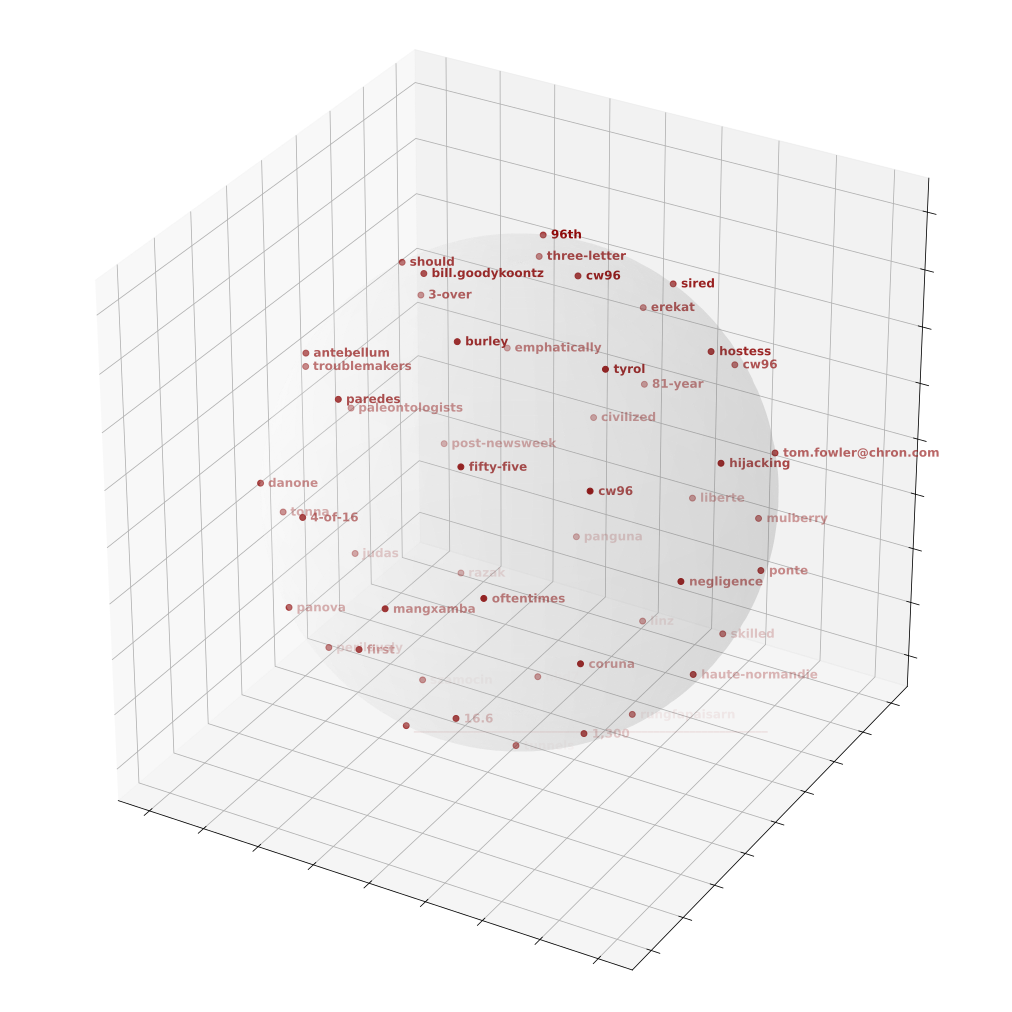

In [5]:
plot_som(corpus_embeddings, iters=1000, sigma_initial=0.001, seed=1)

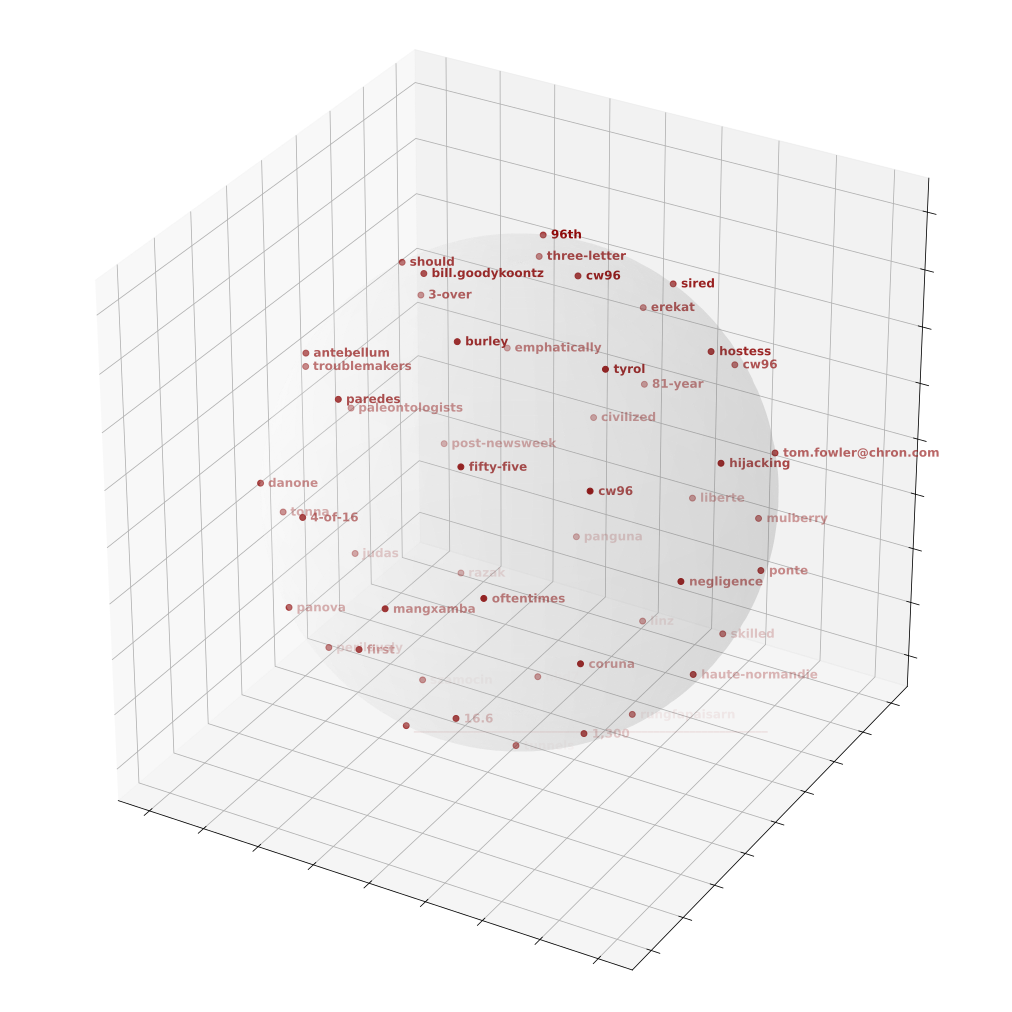

In [6]:
plot_som(corpus_embeddings, iters=10000, sigma_initial=0.001, seed=1)

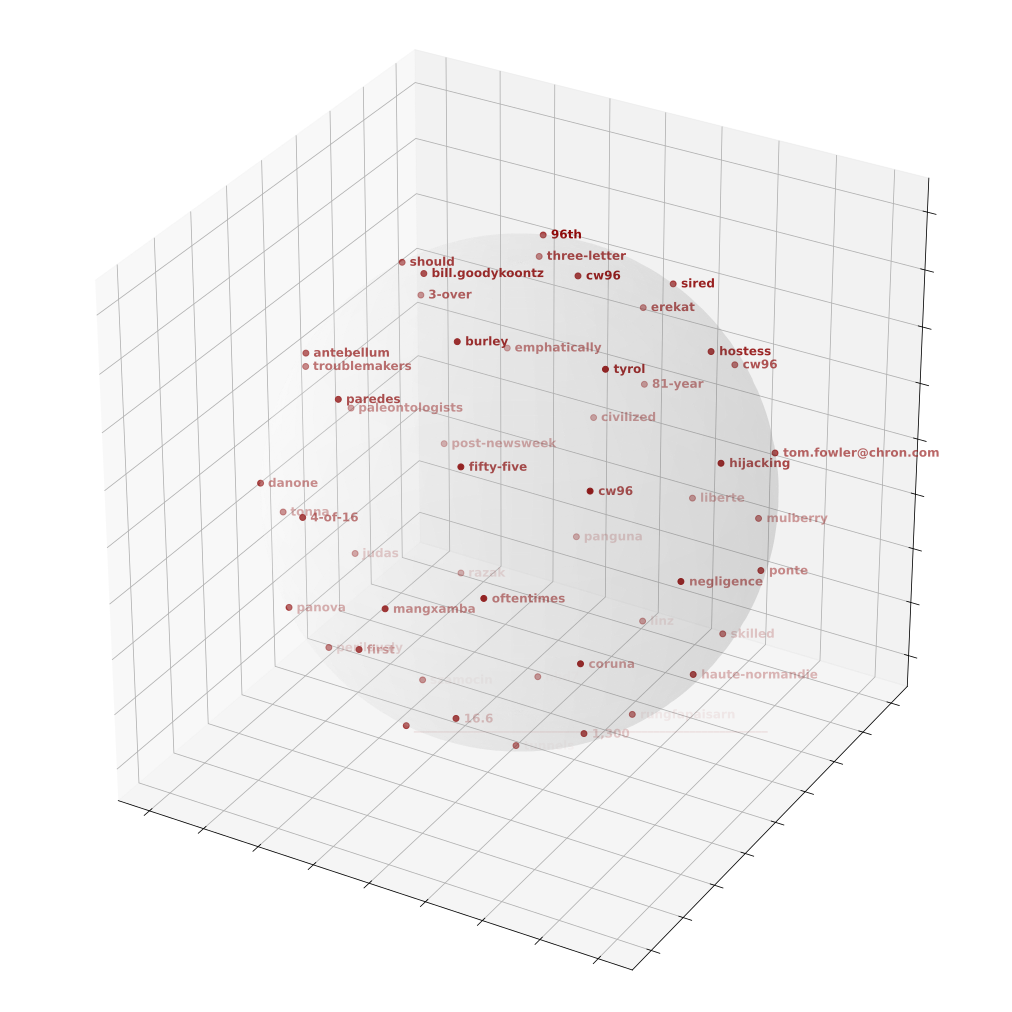

In [7]:
plot_som(corpus_embeddings, iters=10000, sigma_initial=0.01, seed=1)

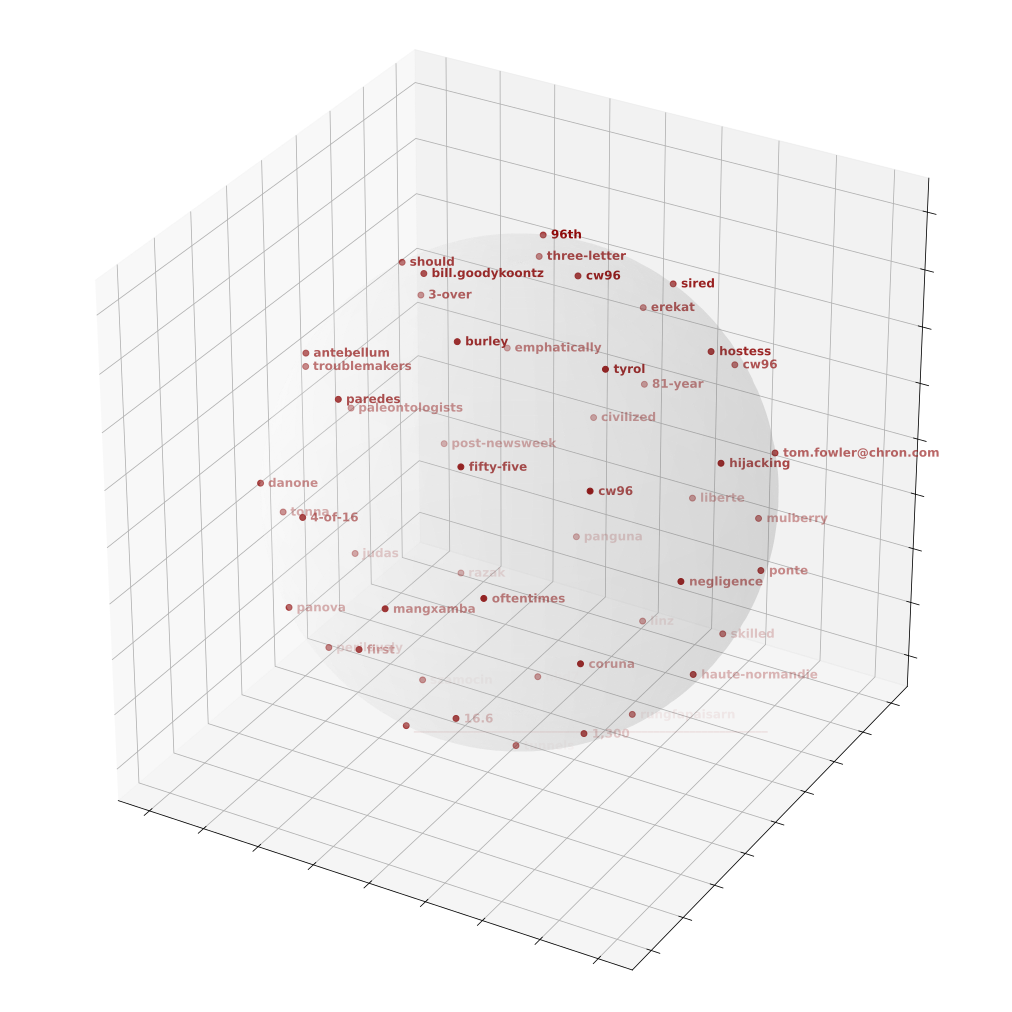

In [8]:
plot_som(corpus_embeddings, iters=100000, sigma_initial=0.01, seed=1)